In [1]:
import os
import sys
import glob
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

In [2]:
if 'Windows' in platform.platform() and '8.1' in platform.release():
    _ = "C:\\Users\\Andrey\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '7' in platform.release():
    _ = "E:\\Disk.Yandex\\3.Programing\\"
    DATA_DIR = "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '10' in platform.release():
    _ = "F:\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    ALL_DATA = "F:\\YandexDisk\\1.Работа\\Результаты обработки\\"
    DELIMITER = "\\"

elif 'Linux' in platform.platform() and '4.4.0' in platform.release():
    _ = "/home/andr/Yandex.Disk/3.Programing/"
    DATA_DIR = _ + "work/PulseViewer/pulsarsData/"
    PATTERN_DIR = _ + "/work/PulseViewer/frame_of_AP/patterns/"
    PACK_DIR = _ + "myPacks/"
    ALL_DATA = "/home/andr/Yandex.Disk/1.Работа/Результаты обработки/"
    DELIMITER = "/"

else:
    print('unknown system', platform.platform(), platform.release())

TEST_PIC = _ + 'test_pic'
sys.path.append(PACK_DIR)
from PRAO import *

In [3]:
gp_table = pd.read_table('crab_gp_kaz_10_2010-2018_calib.csv', sep='\t')

In [11]:
gp_table.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,fName,Type
0,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430,34,1720.0,11.285902,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,1,21354,93.415960,19.17135,99.00000,./gp_plot/05.09.2010_plot_0531+21_0.png,./gp_plot_txt/05.09.2010_plot_0531+21_1.csv,
1,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1720.0,12.771049,./obs_plot/09.09.2010_plot_0531+21.png,.\obs_data\09.09.2010_obs_0531+21.csv,1,45640,121.280215,19.30995,54.57375,./gp_plot/09.09.2010_plot_0531+21_0.png,./gp_plot_txt/09.09.2010_plot_0531+21_1.csv,
2,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1720.0,11.308971,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,1,36629,113.193160,19.54755,63.99360,./gp_plot/12.09.2010_plot_0531+21_0.png,./gp_plot_txt/12.09.2010_plot_0531+21_1.csv,
3,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430,34,1720.0,12.099526,./obs_plot/17.09.2010_plot_0531+21.png,.\obs_data\17.09.2010_obs_0531+21.csv,1,41855,106.751170,18.80505,39.28815,./gp_plot/17.09.2010_plot_0531+21_0.png,./gp_plot_txt/17.09.2010_plot_0531+21_1.csv,
4,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,1,27361,232.176380,21.53745,74.91825,./gp_plot/17.10.2010_plot_0531+21_0.png,./gp_plot_txt/17.10.2010_plot_0531+21_1.csv,


In [10]:
gp_table["Type"] = ""

In [13]:
for indx, row in tqdm_notebook(gp_table.iterrows()):
    pulse = np.loadtxt(row['fName'], skiprows=4)
    intersection_05 = np.argwhere(np.diff(np.sign(pulse - 0.5*np.max(pulse)))).flatten()
    pulses_05 = len(intersection_05)/2

    if np.mean(pulse[-5:]) == 0 or np.mean(pulse[:5]) == 0:
        gp_table["Type"][indx] = "Noise"
    elif pulses_05 > 9 or pulses_05 < 1:
        gp_table["Type"][indx] = "Noise"
    elif int(row['W10, point']) == 99 or int(row['W50, point']) == 99:
        gp_table["Type"][indx] = "Noise"
    elif int(row['W50, point']) < 10:
        gp_table["Type"][indx] = "Noise"
    elif int(row['W10, point']) < 10:
        gp_table["Type"][indx] = "Noise"
    else:
        gp_table["Type"][indx] = "Pulse"

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [15]:
gp_table["Type"][0] = "Pulse"

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
gp_table["Type"][jk] = "Noise"   

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
gp_table

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","W50, point","W10, point",path plot,fName,Type
0,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430,34,1720.0,11.285902,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,1,21354,93.415960,19.17135,99.00000,./gp_plot/05.09.2010_plot_0531+21_0.png,./gp_plot_txt/05.09.2010_plot_0531+21_1.csv,Pulse
1,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430,34,1720.0,12.771049,./obs_plot/09.09.2010_plot_0531+21.png,.\obs_data\09.09.2010_obs_0531+21.csv,1,45640,121.280215,19.30995,54.57375,./gp_plot/09.09.2010_plot_0531+21_0.png,./gp_plot_txt/09.09.2010_plot_0531+21_1.csv,Pulse
2,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430,34,1720.0,11.308971,./obs_plot/12.09.2010_plot_0531+21.png,.\obs_data\12.09.2010_obs_0531+21.csv,1,36629,113.193160,19.54755,63.99360,./gp_plot/12.09.2010_plot_0531+21_0.png,./gp_plot_txt/12.09.2010_plot_0531+21_1.csv,Pulse
3,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430,34,1720.0,12.099526,./obs_plot/17.09.2010_plot_0531+21.png,.\obs_data\17.09.2010_obs_0531+21.csv,1,41855,106.751170,18.80505,39.28815,./gp_plot/17.09.2010_plot_0531+21_0.png,./gp_plot_txt/17.09.2010_plot_0531+21_1.csv,Pulse
4,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,1,27361,232.176380,21.53745,74.91825,./gp_plot/17.10.2010_plot_0531+21_0.png,./gp_plot_txt/17.10.2010_plot_0531+21_1.csv,Pulse
5,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430,34,1720.0,16.700985,./obs_plot/17.10.2010_plot_0531+21.png,.\obs_data\17.10.2010_obs_0531+21.csv,1,3239,166.038030,12.97395,91.20375,./gp_plot/17.10.2010_plot_0531+21_1.png,./gp_plot_txt/17.10.2010_plot_0531+21_2.csv,Pulse
6,18.10.2010,04:15:21.7248325,2.4576,5.988906,2430,34,1720.0,13.818881,./obs_plot/18.10.2010_plot_0531+21.png,.\obs_data\18.10.2010_obs_0531+21.csv,1,32615,82.396050,11.28105,37.03590,./gp_plot/18.10.2010_plot_0531+21_0.png,./gp_plot_txt/18.10.2010_plot_0531+21_1.csv,Pulse
7,19.10.2010,04:11:25.8177452,2.4576,5.988917,2430,34,1720.0,15.235970,./obs_plot/19.10.2010_plot_0531+21.png,.\obs_data\19.10.2010_obs_0531+21.csv,1,72039,108.946950,11.64240,38.53575,./gp_plot/19.10.2010_plot_0531+21_0.png,./gp_plot_txt/19.10.2010_plot_0531+21_1.csv,Noise
8,19.10.2010,04:11:25.8177452,2.4576,5.988917,2430,34,1720.0,15.235970,./obs_plot/19.10.2010_plot_0531+21.png,.\obs_data\19.10.2010_obs_0531+21.csv,1,26891,102.669660,16.03800,38.49615,./gp_plot/19.10.2010_plot_0531+21_1.png,./gp_plot_txt/19.10.2010_plot_0531+21_2.csv,Pulse
9,19.10.2010,04:11:25.8177452,2.4576,5.988917,2430,34,1720.0,15.235970,./obs_plot/19.10.2010_plot_0531+21.png,.\obs_data\19.10.2010_obs_0531+21.csv,1,20817,89.004110,14.27580,36.80325,./gp_plot/19.10.2010_plot_0531+21_2.png,./gp_plot_txt/19.10.2010_plot_0531+21_3.csv,Pulse


In [5]:
f_to_pulse = sorted(glob.glob('./to_pulse/*.png'))

In [6]:
for file in tqdm_notebook(f_to_pulse):
    idx = int(os.path.basename(file)[16:-4])
    gp_table["Type"][idx] = "Pulse"

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


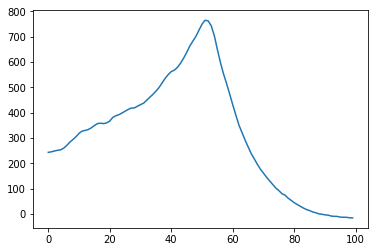

In [17]:
plt.close()
plt.plot()
plt.show()

In [7]:
gp_table.to_csv('crab_gp_kaz_10_2016-2018_calib_typed.csv',  sep='\t', header=True, index=False)

In [3]:
gp_table = pd.read_table('crab_gp_kaz_10_2016-2018_calib_typed.csv', sep='\t')

In [12]:
gp_table['Type'][13107]

'Pulse'

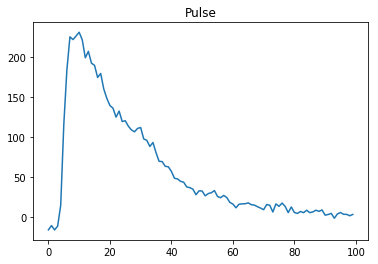

In [6]:
for indx, row in tqdm_notebook(gp_table.iterrows()):
    pulse = np.loadtxt(row['fName'], skiprows=4)
    plt.close()
    plt.title(row['Type'])
    plt.plot(pulse)

    if row['Type'] == 'Pulse':
        plt.savefig('./pulses/' + row['Date'] + '_plot_' + str(indx) + '.png',
                    format='png')
    elif row['Type'] == 'Noise':
        plt.savefig('./trash/' + row['Date'] + '_plot_' + str(indx) + '.png',
                    format='png')
    else:
        print('Alert! Something wrong!!!')